<a href="https://colab.research.google.com/github/linarahmatin/PCVK25_3F_30/blob/main/Week6_30.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Nama  : Sesy Tana Lina Rahmatin
#kelas : TI-3F
#Nim   : 2341720029

#PRAKTIKUM FILTER

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

In [3]:
def convolution2d(image, kernel, stride, padding):
  pass

In [4]:
def convolution2d(image, kernel, stride=1, padding=0):
    # Tambahkan padding
    image_padded = np.pad(image, ((padding, padding), (padding, padding)), mode='constant')

    kernel_height, kernel_width = kernel.shape
    output_height = (image_padded.shape[0] - kernel_height) // stride + 1
    output_width = (image_padded.shape[1] - kernel_width) // stride + 1

    output = np.zeros((output_height, output_width))

    for y in range(0, output_height):
        for x in range(0, output_width):
            region = image_padded[y*stride:y*stride+kernel_height, x*stride:x*stride+kernel_width]
            output[y, x] = np.sum(region * kernel)

    return output

In [6]:
img = cv.imread('/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_30/Gambar/mandrill.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

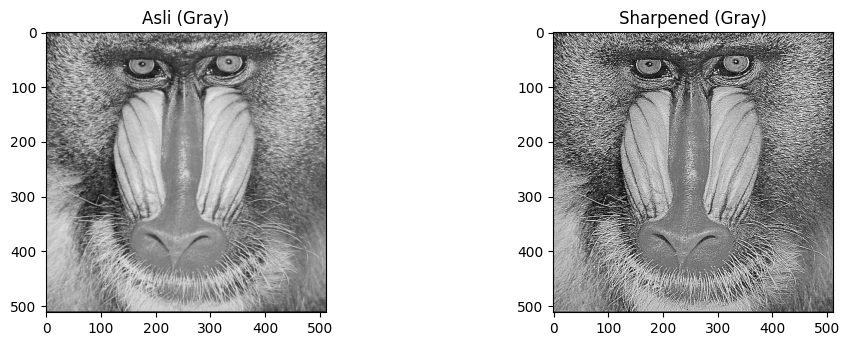

In [7]:
kernel_sharpen = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

img = cv.imread("/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_30/Gambar/mandrill.tiff")

# Terapkan sharpening
sharpened = cv.filter2D(img, -1, kernel_sharpen)

# Ubah ke grayscale
gray_original = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_sharpened = cv.cvtColor(sharpened, cv.COLOR_BGR2GRAY)

# Plot hasil
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.imshow(gray_original, cmap="gray")
plt.title("Asli (Gray)")

plt.subplot(2,2,2)
plt.imshow(gray_sharpened, cmap="gray")
plt.title("Sharpened (Gray)")
plt.show()


In [8]:
convolution2d(img_gray, kernel_sharpen,1,2)

array([[   0., -145.,  -56., ..., -153., -177.,    0.],
       [-145.,  553.,  -15., ...,  326.,  607., -177.],
       [-116.,  257.,  179., ...,  249.,  218., -125.],
       ...,
       [-156.,  487.,  262., ...,  159.,  183.,  -69.],
       [ -11., -112., -110., ...,  -71.,  -53.,   -4.],
       [   0.,  -11.,  -11., ...,   -4.,   -4.,    0.]])

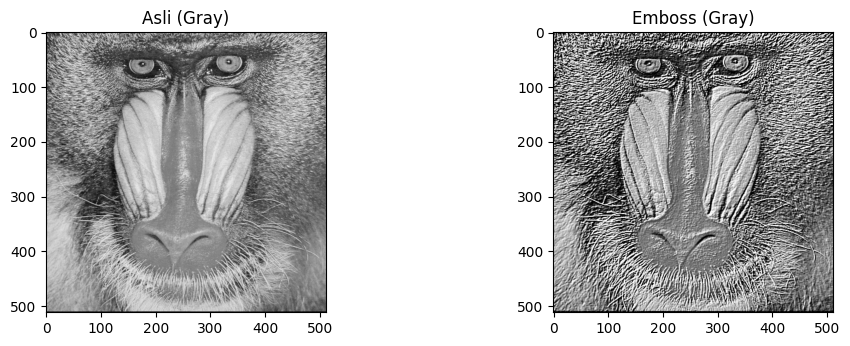

In [9]:
kernel_emboss = np.array([[-2,-1,0],
                           [-1,1,1],
                           [0,1,2]])

img = cv.imread("/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_30/Gambar/mandrill.tiff")

emboss = cv.filter2D(img, -1, kernel_emboss)

# Ubah ke grayscale
gray_original = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_emboss = cv.cvtColor(emboss, cv.COLOR_BGR2GRAY)

# Plot hasil
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.imshow(gray_original, cmap="gray")
plt.title("Asli (Gray)")

plt.subplot(2,2,2)
plt.imshow(gray_emboss, cmap="gray")
plt.title("Emboss (Gray)")
plt.show()

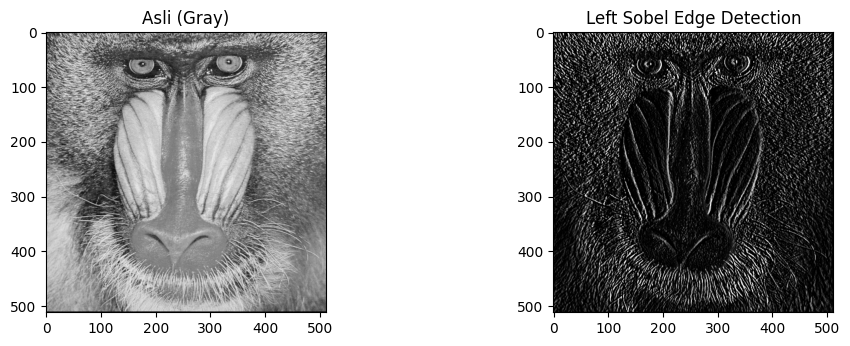

In [10]:
kernel_left_sobel = np.array([[1,0,-1],
                           [2,0,-2],
                           [1,0,-1]])

img = cv.imread("/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_30/Gambar/mandrill.tiff")

left_sobel = cv.filter2D(img, -1, kernel_left_sobel)

gray_original = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
gray_left_sobel = cv.cvtColor(left_sobel, cv.COLOR_BGR2GRAY)

plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
plt.imshow(gray_original, cmap="gray")
plt.title("Asli (Gray)")

plt.subplot(2,2,2)
plt.imshow(gray_left_sobel, cmap="gray")
plt.title("Left Sobel Edge Detection")
plt.show()


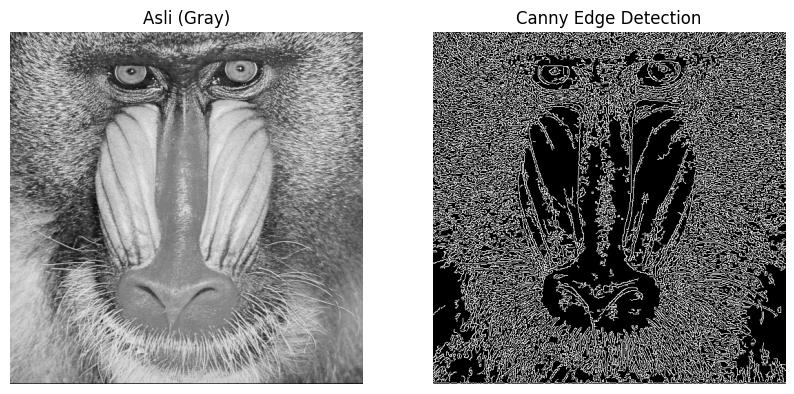

In [11]:
kernel_canny = np.array([
    [-1, -1, -1],
     [-1, 8, -1],
      [-1, -1, -1] ])

img = cv.imread("/content/drive/MyDrive/Colab Notebooks/PCVK25_3F_30/Gambar/mandrill.tiff")
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)


edges = cv.Canny(img_gray, 50, 150)

# Tampilkan
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.title("Asli (Gray)")
plt.imshow(img_gray, cmap="gray")
plt.axis("off")

plt.subplot(1,2,2)
plt.title("Canny Edge Detection")
plt.imshow(edges, cmap="gray")
plt.axis("off")

plt.show()


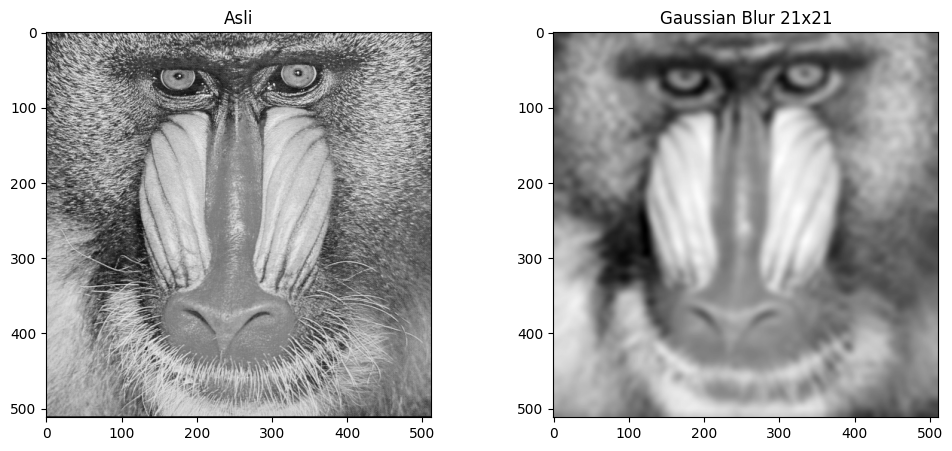

In [12]:
# gaussian blur

kernel_size = 21
sigma = math.sqrt(kernel_size)

# 1D Gaussian kernel
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)

# 2D Gaussian kernel
gauss_kernel = gaussian_kernel @ gaussian_kernel.T

# pastikan normalisasi (jumlah = 1)
gauss_kernel = gauss_kernel / gauss_kernel.sum()

# gambar mandrill
blurred = cv.filter2D(img_gray, -1, gauss_kernel)

# tampilkan hasil
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.title("Asli")
plt.imshow(img_gray, cmap="gray")
plt.axis("on")

plt.subplot(1,2,2)
plt.title("Gaussian Blur 21x21")
plt.imshow(blurred, cmap="gray")
plt.axis("on")

plt.show()